Ким, М8О-114СВ-24

Лабораторная работа 2.

Глобальная оптимизация и метаэврестические алгоритмы

В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [ ]:
!pip install pygmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 56.6 MB/s eta 0:00:00


In [ ]:
import pygmo as pg
import numpy as np
import time

import pandas as pd

class Rosenbrock:
    def fitness(self, x):
        return [(1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2]

    def get_bounds(self):
        return ([-5, -5], [5, 5])

class Himmelblau:
    def fitness(self, x):
        return [(x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2]

    def get_bounds(self):
        return ([-5, -5], [5, 5])



In [ ]:

def optimize(problem, algo_list, n_trials=1):
    results = []

    for algo_name, algo in algo_list:
        for trial in range(n_trials):
            prob = pg.problem(problem)
            pop = pg.population(prob, 20)
            algo_instance = pg.algorithm(algo)

            start_time = time.time()
            pop = algo_instance.evolve(pop)
            duration = time.time() - start_time

            best_solution = pop.champion_x
            best_fitness = pop.champion_f[0]

            results.append({
                "Algorithm": algo_name,
                "Trial": trial + 1,
                "Best Solution": best_solution,
                "Best Fitness": best_fitness,
                "Time (s)": duration
            })

    return results

# Алгоритмы для тестирования
algorithms = [
    ("Artificial Bee Colony", pg.bee_colony()),
    ("Particle Swarm Optimization", pg.pso()),
    ("Gray Wolf Optimizer", pg.gwo())
]

# Оптимизация для Розенброка
rosen_results = optimize(Rosenbrock(), algorithms, n_trials=3)

# Оптимизация для Химмельблау
himmel_results = optimize(Himmelblau(), algorithms, n_trials=3)

rosen_df = pd.DataFrame(rosen_results)
himmel_df = pd.DataFrame(himmel_results)

In [ ]:
rosen_df


,Algorithm,Trial,Best Solution,Best Fitness,Time (s)
0,Artificial Bee Colony,1,"[1.766454043871338, 3.2416756007906193]",2.059202,0.000304
1,Artificial Bee Colony,2,"[1.9551546410226726, 3.717170867143979]",2.024476,0.000259
2,Artificial Bee Colony,3,"[-1.4045634556655688, 1.9692286675451112]",5.783200,0.000272
3,Particle Swarm Optimization,1,"[1.245941762662337, 1.4064918532852158]",2.188556,0.000191
4,Particle Swarm Optimization,2,"[2.0757364532202156, 4.523436586286966]",5.769170,0.003382
5,Particle Swarm Optimization,3,"[1.2265089655302517, 1.4391781108711954]",0.475708,0.000308
6,Gray Wolf Optimizer,1,"[-0.18186074013464015, 0.3613632713519488]",12.174223,0.000267
7,Gray Wolf Optimizer,2,"[-0.6661413921837722, 0.3217118926397511]",4.265219,0.000163
8,Gray Wolf Optimizer,3,"[0.49513374921634234, 0.7970714688479834]",30.715801,0.000173


In [ ]:
himmel_df

,Algorithm,Trial,Best Solution,Best Fitness,Time (s)
0,Artificial Bee Colony,1,"[3.4528368663863738, -1.4058945037425137]",2.700933,0.000298
1,Artificial Bee Colony,2,"[-2.671360635842685, 3.0432497456730694]",0.841449,0.000284
2,Artificial Bee Colony,3,"[-2.6407342527520297, 2.8871438738018345]",3.001560,0.000287
3,Particle Swarm Optimization,1,"[-2.9282165179690027, 3.499918105592375]",6.542288,0.000210
4,Particle Swarm Optimization,2,"[-2.711901122698855, 3.1367211874547527]",0.275109,0.000184
5,Particle Swarm Optimization,3,"[-3.142660417442693, 2.8663192458216082]",6.749617,0.000192
6,Gray Wolf Optimizer,1,"[-3.5562709484669814, -3.6509230609228682]",11.704808,0.000162
7,Gray Wolf Optimizer,2,"[3.460221758606581, 1.4336319698918212]",7.996199,0.000183
8,Gray Wolf Optimizer,3,"[3.4862636069932136, 1.5930632434944927]",8.498896,0.000163


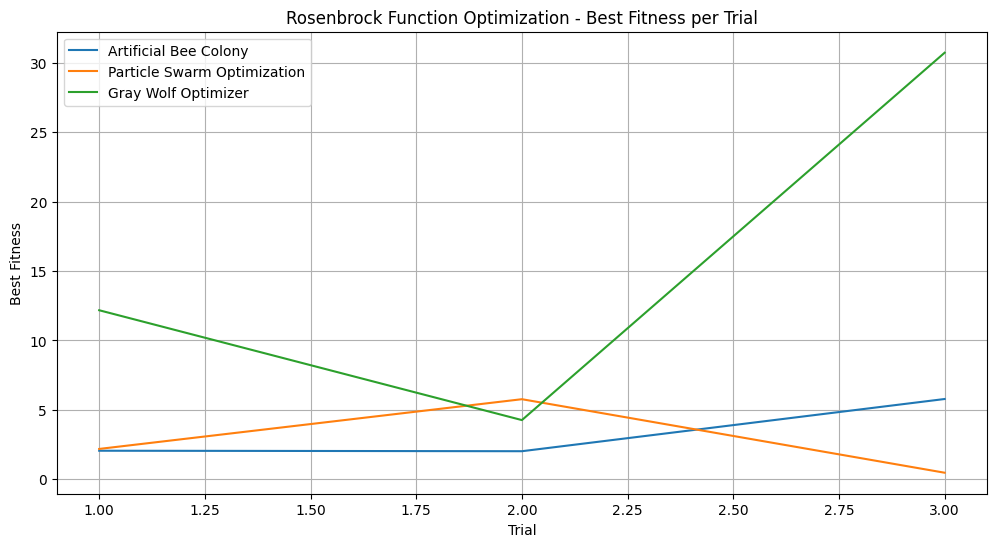

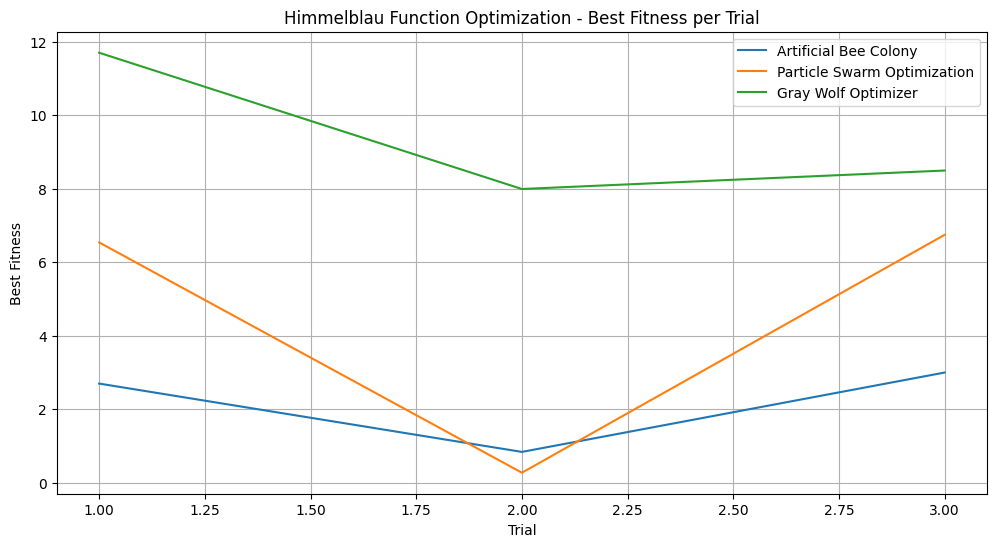

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for algo in rosen_df['Algorithm'].unique():
    algo_data = rosen_df[rosen_df['Algorithm'] == algo]
    plt.plot(algo_data['Trial'], algo_data['Best Fitness'], label=algo)

plt.xlabel('Trial')
plt.ylabel('Best Fitness')
plt.title('Rosenbrock Function Optimization - Best Fitness per Trial')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for algo in himmel_df['Algorithm'].unique():
    algo_data = himmel_df[himmel_df['Algorithm'] == algo]
    plt.plot(algo_data['Trial'], algo_data['Best Fitness'], label=algo)

plt.xlabel('Trial')
plt.ylabel('Best Fitness')
plt.title('Himmelblau Function Optimization - Best Fitness per Trial')
plt.legend()
plt.grid(True)
plt.show()